In [1]:
# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [14]:
import xarray as xr
bc_path = Path(r"/csiem/ROMS/2020/")
bc_file = 'ROMS_UTC+8_20001001_20011231.nc'

In [15]:
ds=ds = xr.open_dataset(bc_path / bc_file, chunks=dict(time=1))
ds

<xarray.Dataset>
Dimensions:     (time: 3652, lon: 52, lat: 78, depth: 39)
Coordinates:
  * time        (time) datetime64[ns] 2000-10-01T23:00:00.000003328 ... 2002-...
  * lon         (lon) float32 114.3 114.3 114.4 114.4 ... 115.7 115.8 115.8
  * lat         (lat) float32 -33.7 -33.66 -33.62 -33.58 ... -30.58 -30.54 -30.5
  * depth       (depth) float32 0.0 2.0 2.5 3.0 ... 500.0 1e+03 1.5e+03 2e+03
Data variables:
    water_u     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    water_v     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    surf_el     (time, lat, lon) float32 dask.array<chunksize=(1, 78, 52), meta=np.ndarray>
    water_temp  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    salinity    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>

In [16]:
ds= ds.resample(time="1D").mean()
ds

<xarray.Dataset>
Dimensions:     (lon: 52, lat: 78, depth: 39, time: 458)
Coordinates:
  * lon         (lon) float32 114.3 114.3 114.4 114.4 ... 115.7 115.8 115.8
  * lat         (lat) float32 -33.7 -33.66 -33.62 -33.58 ... -30.58 -30.54 -30.5
  * depth       (depth) float32 0.0 2.0 2.5 3.0 ... 500.0 1e+03 1.5e+03 2e+03
  * time        (time) datetime64[ns] 2000-10-01 2000-10-02 ... 2002-01-01
Data variables:
    water_u     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    water_v     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    surf_el     (time, lat, lon) float32 dask.array<chunksize=(1, 78, 52), meta=np.ndarray>
    water_temp  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    salinity    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>

In [17]:
ds= ds.sel(time=slice("2001-01-01", "2001-12-31"))
ds

<xarray.Dataset>
Dimensions:     (lon: 52, lat: 78, depth: 39, time: 365)
Coordinates:
  * lon         (lon) float32 114.3 114.3 114.4 114.4 ... 115.7 115.8 115.8
  * lat         (lat) float32 -33.7 -33.66 -33.62 -33.58 ... -30.58 -30.54 -30.5
  * depth       (depth) float32 0.0 2.0 2.5 3.0 ... 500.0 1e+03 1.5e+03 2e+03
  * time        (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2001-12-31
Data variables:
    water_u     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    water_v     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    surf_el     (time, lat, lon) float32 dask.array<chunksize=(1, 78, 52), meta=np.ndarray>
    water_temp  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    salinity    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>

In [18]:
ds= ds.to_netcdf("/csiem/ROMS/2020_sliced/ROMS_2001.nc")

In [30]:
ds

<xarray.Dataset>
Dimensions:     (lon: 52, lat: 78, depth: 39, time: 366)
Coordinates:
  * lon         (lon) float32 114.3 114.3 114.4 114.4 ... 115.7 115.8 115.8
  * lat         (lat) float32 -33.7 -33.66 -33.62 -33.58 ... -30.58 -30.54 -30.5
  * depth       (depth) float32 0.0 2.0 2.5 3.0 ... 500.0 1e+03 1.5e+03 2e+03
  * time        (time) datetime64[ns] 2008-01-01 2008-01-02 ... 2008-12-31
Data variables:
    water_u     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    water_v     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    surf_el     (time, lat, lon) float32 dask.array<chunksize=(1, 78, 52), meta=np.ndarray>
    water_temp  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    salinity    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>

### Curtian Plots

In [4]:
import tfv.xarray
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [5]:
ds=xr.open_dataset("/csiem/ROMS/Monthly ROMS_2001_2023.nc")
ds

<xarray.Dataset>
Dimensions:     (time: 276, depth: 39, lat: 78, lon: 52)
Coordinates:
  * lon         (lon) float32 114.3 114.3 114.4 114.4 ... 115.7 115.8 115.8
  * lat         (lat) float32 -33.7 -33.66 -33.62 -33.58 ... -30.58 -30.54 -30.5
  * depth       (depth) float32 0.0 2.0 2.5 3.0 ... 500.0 1e+03 1.5e+03 2e+03
  * time        (time) datetime64[ns] 2001-01-31 2001-02-28 ... 2023-12-31
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
    salinity    (time, depth, lat, lon) float32 ...

In [6]:
latitude = -32  # replace with your desired latitude
ds_at_latitude = ds.sel(lat=latitude,  method='nearest')

In [7]:
ds_at_latitude=ds_at_latitude.mean(dim='time')

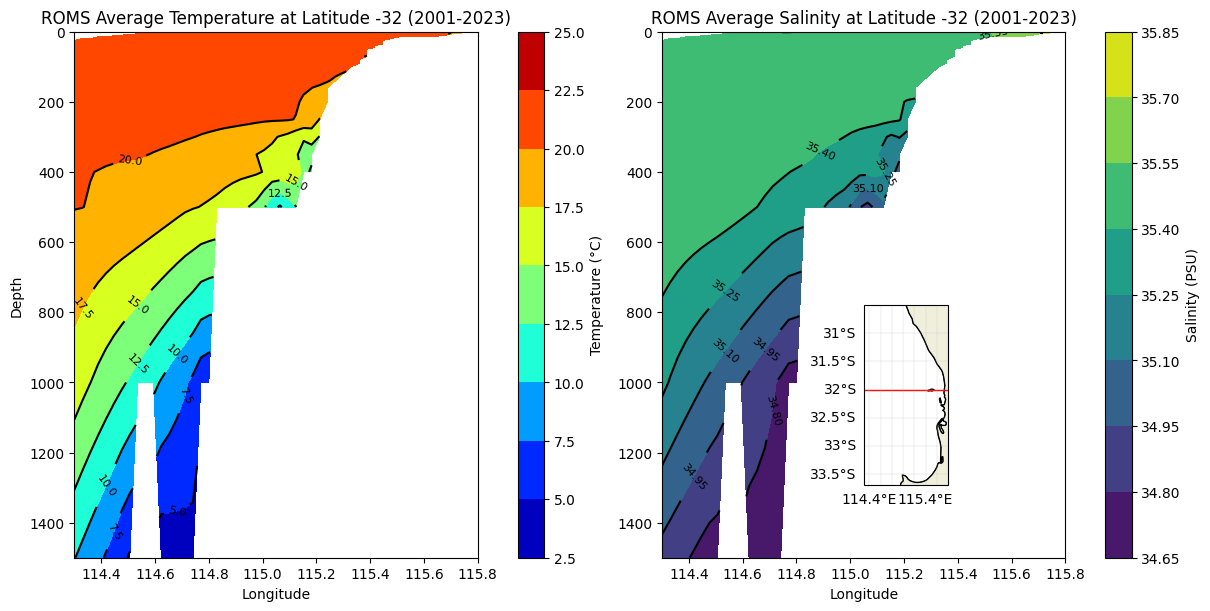

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Plot temperature on the left
c1 = axes[0].contourf(
    ds_at_latitude['lon'], 
    ds_at_latitude['depth'], 
    ds_at_latitude.water_temp.values, 
    cmap='jet'
)
contour_lines1 = axes[0].contour(
    ds_at_latitude['lon'], 
    ds_at_latitude['depth'], 
    ds_at_latitude.water_temp.values, 
    colors='black'
)
axes[0].clabel(contour_lines1, inline=True, fontsize=8)  # Add markers to contour lines
fig.colorbar(c1, ax=axes[0], label='Temperature (°C)')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Depth')
axes[0].set_ylim(0, 1500)
axes[0].set_title(f'ROMS Average Temperature at Latitude {latitude} (2001-2023)')
axes[0].invert_yaxis()  # Make depth increase downwards

# Plot salinity on the right
c2 = axes[1].contourf(
    ds_at_latitude['lon'], 
    ds_at_latitude['depth'], 
    ds_at_latitude.salinity.values, 
    cmap='viridis'
)
contour_lines2 = axes[1].contour(
    ds_at_latitude['lon'], 
    ds_at_latitude['depth'], 
    ds_at_latitude.salinity.values, 
    colors='black'
)
axes[1].clabel(contour_lines2, inline=True, fontsize=8)  # Add markers to contour lines
fig.colorbar(c2, ax=axes[1], label='Salinity (PSU)')
axes[1].set_xlabel('Longitude')
axes[1].set_ylim(0, 1500)
axes[1].set_title(f'ROMS Average Salinity at Latitude {latitude} (2001-2023)')
axes[1].invert_yaxis()  # Make depth increase downwards

# Add a mini-map inset
ax_mini_map = fig.add_axes([0.6, 0.2, 0.3, 0.3], projection=ccrs.PlateCarree())  # Create the mini-map inset
ax_mini_map.add_feature(cfeature.COASTLINE, linewidth=0.5)  # Add coastlines
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')  # Add land mask

# Define the extent based on the dataset
extent = [114.3, 115.8, -33.7, -30.5]
ax_mini_map.set_extent(extent, crs=ccrs.PlateCarree())

# Highlight the selected latitude line
ax_mini_map.plot(
    ds['lon'], 
    [-32] * len(ds['lon']), 
    color='red', 
    linewidth=1, 
    transform=ccrs.PlateCarree(),
    label="Latitude -32"
)

# Add gridlines to the mini-map
gl = ax_mini_map.gridlines(draw_labels=True, linewidth=0.3, alpha=0.5)
gl.right_labels = False  # Remove latitude labels on the right
gl.top_labels = False    # Remove longitude labels on the top

# Add a legend to the mini-map
#ax_mini_map.legend(loc="upper left")

# Display the plots
plt.show()

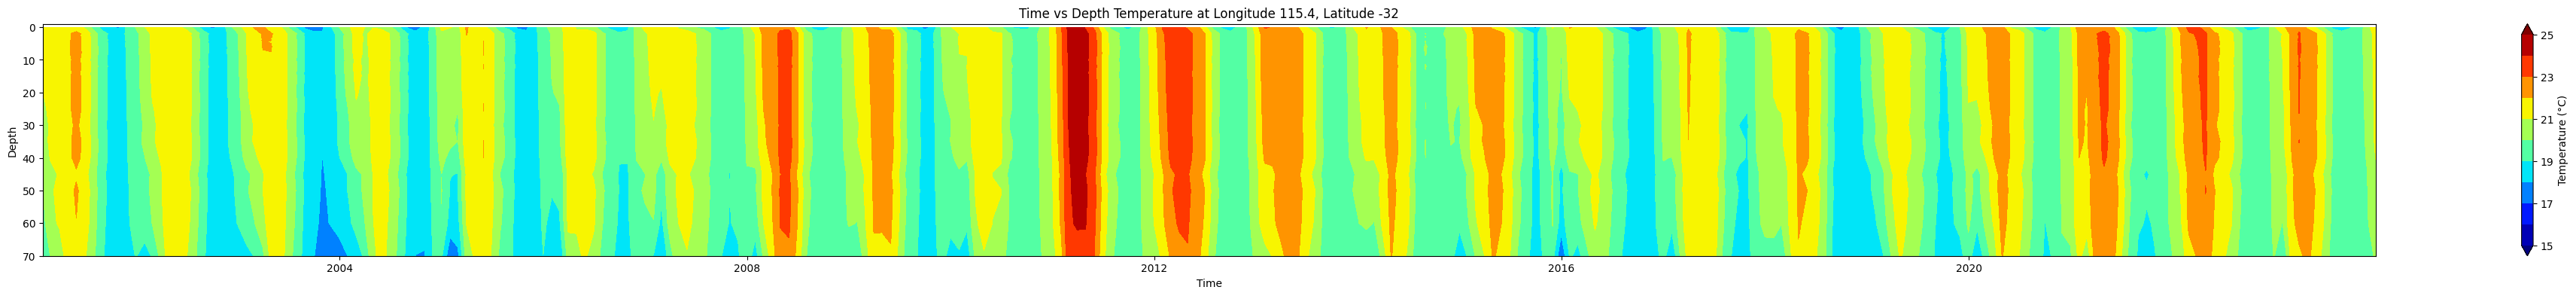

In [14]:
import pandas as pd
# Select a specific longitude and latitude for time vs depth plot
longitude = 115.4  # Replace with the longitude of interest
latitude = -32  # Replace with the latitude of interest

# Slice the dataset at the specific longitude and latitude
ds_at_lon_lat = ds.sel(lon=longitude, lat=latitude, method="nearest")

# Create a contour plot
fig, ax = plt.subplots(figsize=(50, 4))
c = ax.contourf(
    ds_at_lon_lat['time'], 
    ds_at_lon_lat['depth'], 
    ds_at_lon_lat.water_temp.values.T,  # Transpose to match (time, depth)
    cmap='jet', levels=np.arange(15,26,1), extend='both')
# contour_lines = ax.contour(
#     ds_at_lon_lat['time'], 
#     ds_at_lon_lat['depth'], 
#     ds_at_lon_lat.water_temp.values.T, 
#     colors='black'
# )
ax.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contour lines
fig.colorbar(c, ax=ax, label='Temperature (°C)')
ax.set_xlabel('Time')
ax.set_ylabel('Depth')
ax.set_ylim(-1, 70)
ax.set_title(f'Time vs Depth Temperature at Longitude {longitude}, Latitude {latitude}')
ax.invert_yaxis()  # Invert depth axis
plt.show()

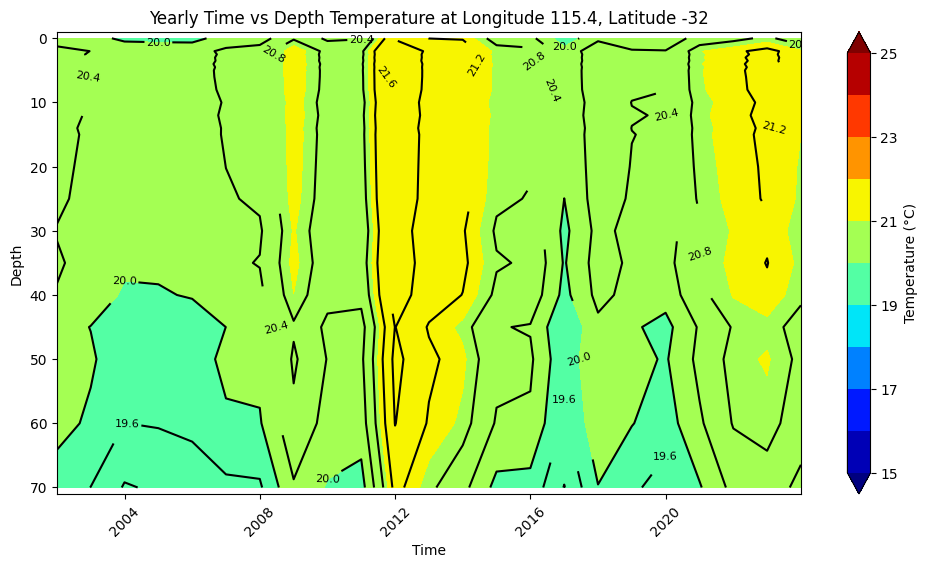

In [38]:
# Resample the dataset to yearly means
ds_yearly = ds_at_lon_lat.resample(time="A").mean()

# Create a contour plot for yearly resampled data
fig, ax = plt.subplots(figsize=(12, 6))
c = ax.contourf(
    ds_yearly['time'], 
    ds_yearly['depth'], 
    ds_yearly.water_temp.values.T,  # Transpose to match (time, depth)
    cmap='jet', levels=np.arange(15, 26, 1), extend='both'
)
contour_lines = ax.contour(
    ds_yearly['time'], 
    ds_yearly['depth'], 
    ds_yearly.water_temp.values.T, 
    colors='black'
)
ax.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contour lines
fig.colorbar(c, ax=ax, label='Temperature (°C)')
ax.set_xlabel('Time')
ax.set_ylabel('Depth')
ax.set_ylim(-1, 71)
ax.set_title(f'Yearly Time vs Depth Temperature at Longitude {longitude}, Latitude {latitude}')
ax.invert_yaxis()  # Invert depth axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

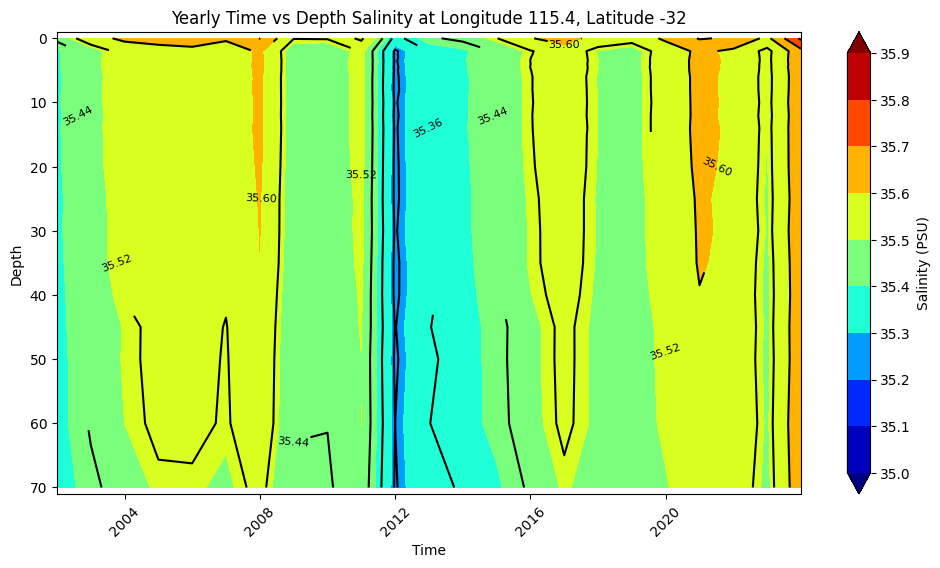

In [42]:
# Resample the dataset to yearly means
ds_yearly = ds_at_lon_lat.resample(time="A").mean()

# Create a contour plot for yearly resampled salinity data
fig, ax = plt.subplots(figsize=(12, 6))
c = ax.contourf(
    ds_yearly['time'], 
    ds_yearly['depth'], 
    ds_yearly.salinity.values.T,  # Transpose to match (time, depth)
    cmap='jet', levels=np.arange(35, 36, 0.1), extend='both'
)
contour_lines = ax.contour(
    ds_yearly['time'], 
    ds_yearly['depth'], 
    ds_yearly.salinity.values.T, 
    colors='black'
)
ax.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contour lines
fig.colorbar(c, ax=ax, label='Salinity (PSU)')
ax.set_xlabel('Time')
ax.set_ylabel('Depth')
ax.set_ylim(-1, 71)  # Adjust depth range for salinity
ax.set_title(f'Yearly Time vs Depth Salinity at Longitude {longitude}, Latitude {latitude}')
ax.invert_yaxis()  # Invert depth axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates

def plot_time_depth(ds, longitude, latitude, ticks='years', time_range=None):
    """
    Plot temperature as a function of depth and time at a specific location, with optional slicing by time.

    Parameters:
        ds (xarray.Dataset): The dataset containing the data.
        longitude (float): Longitude of the location.
        latitude (float): Latitude of the location.
        ticks (str): 'years' for yearly ticks, 'months' for monthly ticks.
        time_range (tuple of str, optional): Start and end time in the format ('YYYY-MM-DD', 'YYYY-MM-DD').
                                             If None, the entire time series is plotted.
    """
    # Slice the dataset by longitude and latitude
    ds_at_lon_lat = ds.sel(lon=longitude, lat=latitude, method="nearest")
    
    # Slice by time range if specified
    if time_range is not None:
        start_time, end_time = time_range
        ds_at_lon_lat = ds_at_lon_lat.sel(time=slice(start_time, end_time))
    
    # Create a contour plot
    fig, ax = plt.subplots(figsize=(15, 6))
    c = ax.contourf(
        ds_at_lon_lat['time'],
        ds_at_lon_lat['depth'],
        ds_at_lon_lat.water_temp.values.T,  # Transpose to match (time, depth)
        cmap='jet', levels=np.arange(15, 26, 1), extend='both'
    )
    # contour_lines = ax.contour(
    #     ds_at_lon_lat['time'],
    #     ds_at_lon_lat['depth'],
    #     ds_at_lon_lat.water_temp.values.T,
    #     colors='black'
    # )
    ax.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contour lines
    fig.colorbar(c, ax=ax, label='Temperature (°C)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim(-1, 80)
    ax.set_title(
        f"Time vs Depth Temperature at Longitude {longitude}, Latitude {latitude}"
        + (f"\nTime Range: {time_range[0]} to {time_range[1]}" if time_range else "")
    )
    ax.invert_yaxis()  # Invert depth axis

    # Customize x-axis ticks
    if ticks == 'years':
        ax.xaxis.set_major_locator(pltdates.YearLocator())
        ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
    elif ticks == 'months':
        ax.xaxis.set_major_locator(pltdates.MonthLocator())
        ax.xaxis.set_major_formatter(pltdates.DateFormatter('%b\n%Y'))

    # Automatically adjust the layout
    plt.tight_layout()
    plt.show()

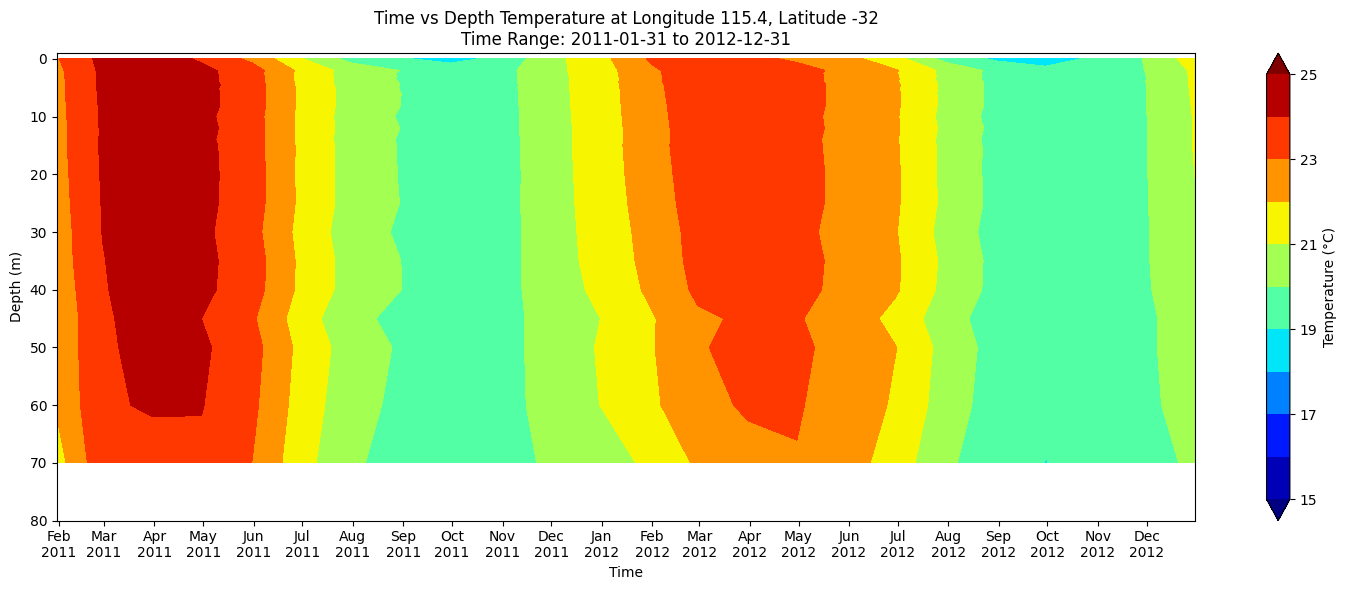

In [28]:
# Specific year
plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2011-01-31', '2012-12-31'))

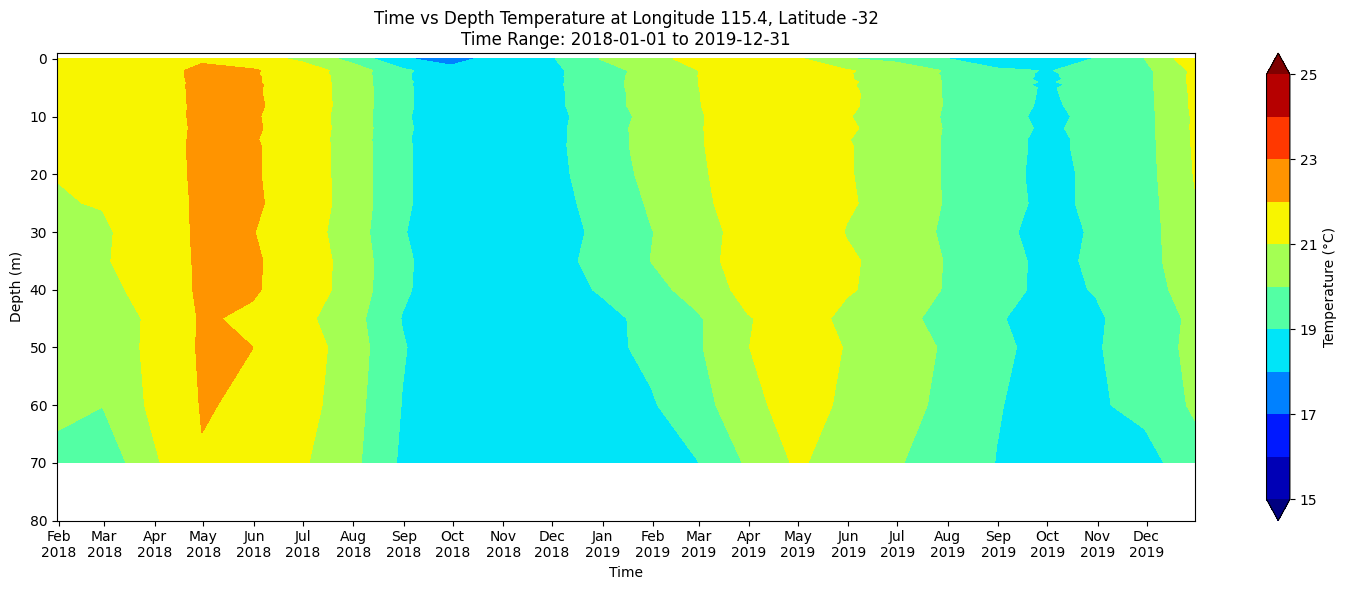

In [32]:
# Custom period
plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2018-01-01', '2019-12-31'))

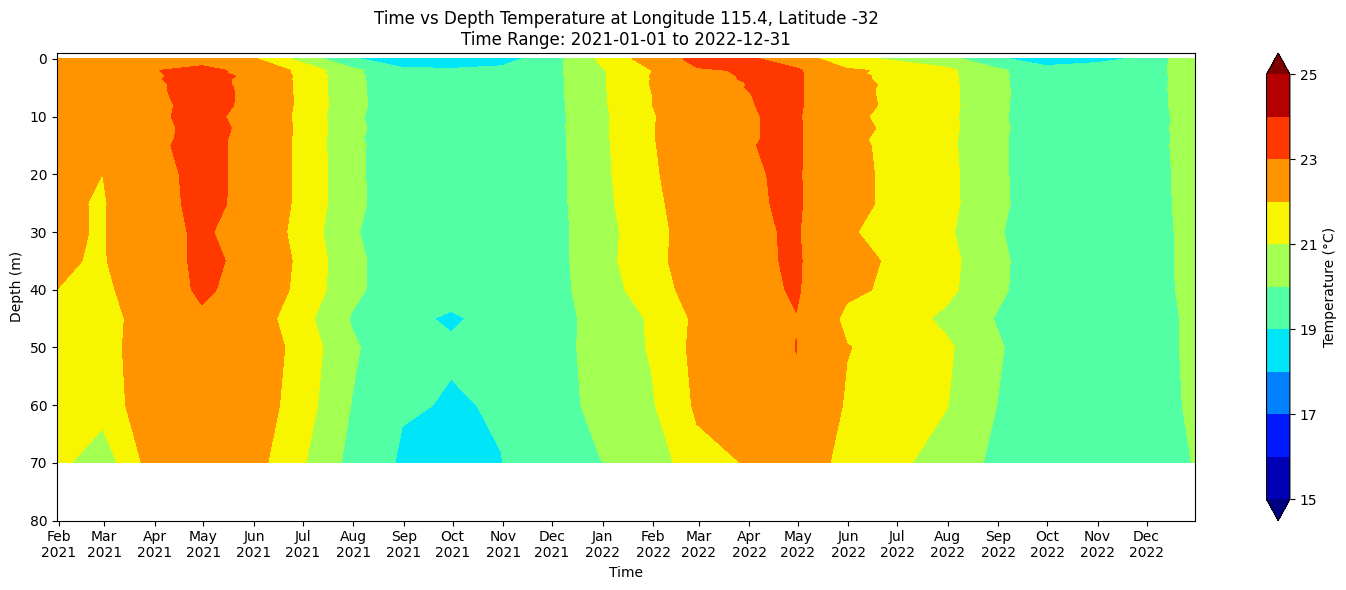

In [33]:
plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2021-01-01', '2022-12-31'))

In [34]:
import xarray as xr
out_dir = "/csiem/ROMS/2020_sliced/"
several_ds = xr.open_mfdataset(f"{out_dir}/ROMS_"+"*.nc")
several_ds

<xarray.Dataset>
Dimensions:     (lon: 52, lat: 78, depth: 39, time: 8400)
Coordinates:
  * lon         (lon) float32 114.3 114.3 114.4 114.4 ... 115.7 115.8 115.8
  * lat         (lat) float32 -33.7 -33.66 -33.62 -33.58 ... -30.58 -30.54 -30.5
  * depth       (depth) float32 0.0 2.0 2.5 3.0 ... 500.0 1e+03 1.5e+03 2e+03
  * time        (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2023-12-31
Data variables:
    water_u     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    water_v     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    surf_el     (time, lat, lon) float32 dask.array<chunksize=(1, 78, 52), meta=np.ndarray>
    water_temp  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    salinity    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>

In [36]:
ds = several_ds[['water_temp', 'salinity']]
print(ds)

<xarray.Dataset>
Dimensions:     (time: 8400, depth: 39, lat: 78, lon: 52)
Coordinates:
  * lon         (lon) float32 114.3 114.3 114.4 114.4 ... 115.7 115.8 115.8
  * lat         (lat) float32 -33.7 -33.66 -33.62 -33.58 ... -30.58 -30.54 -30.5
  * depth       (depth) float32 0.0 2.0 2.5 3.0 ... 500.0 1e+03 1.5e+03 2e+03
  * time        (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2023-12-31
Data variables:
    water_temp  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>
    salinity    (time, depth, lat, lon) float32 dask.array<chunksize=(1, 39, 78, 52), meta=np.ndarray>


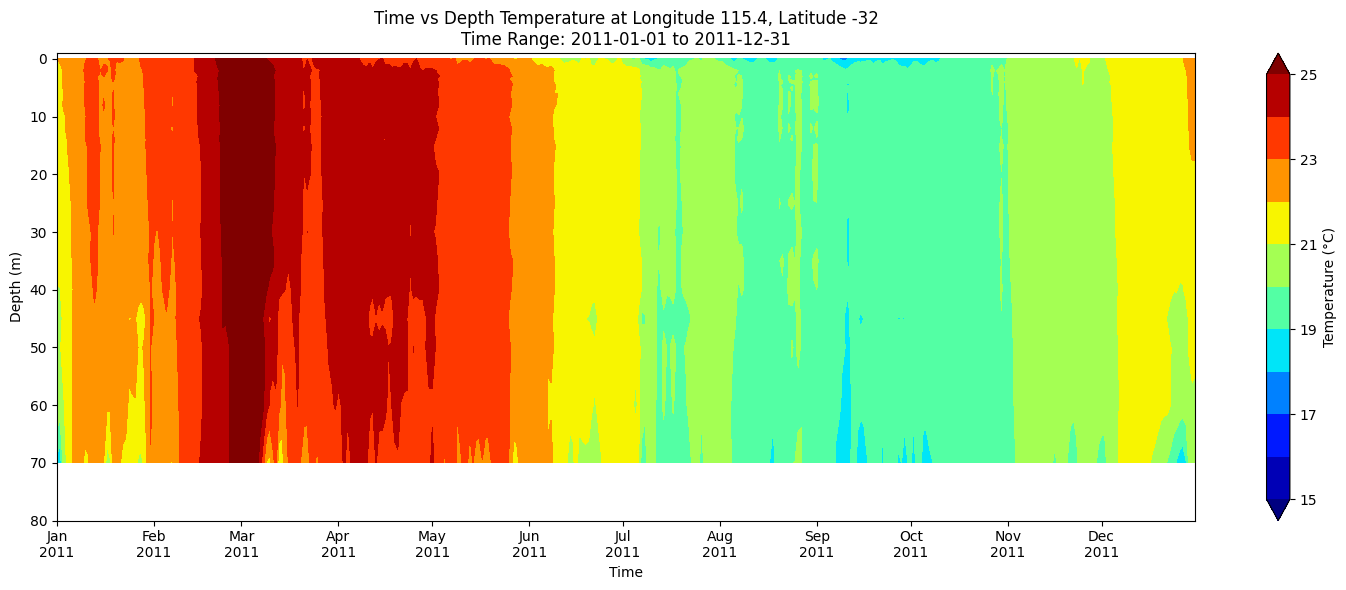

In [37]:
# Specific year11
plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2011-01-01', '2011-12-31'))

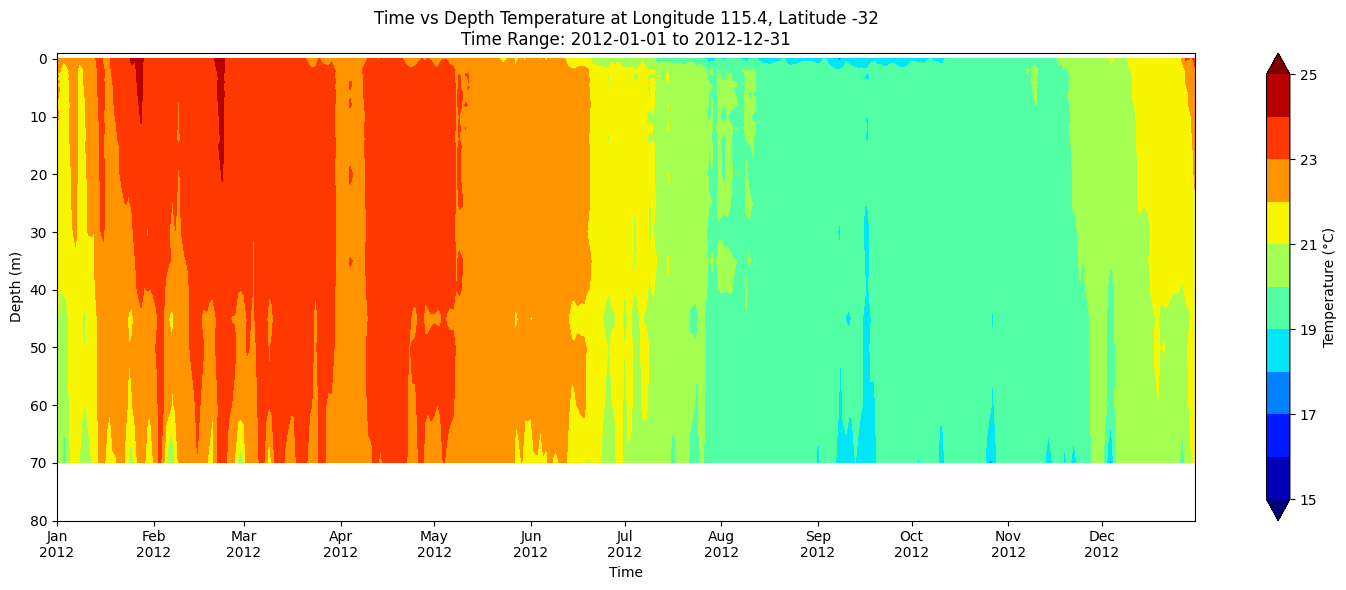

In [38]:
plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2012-01-01', '2012-12-31'))

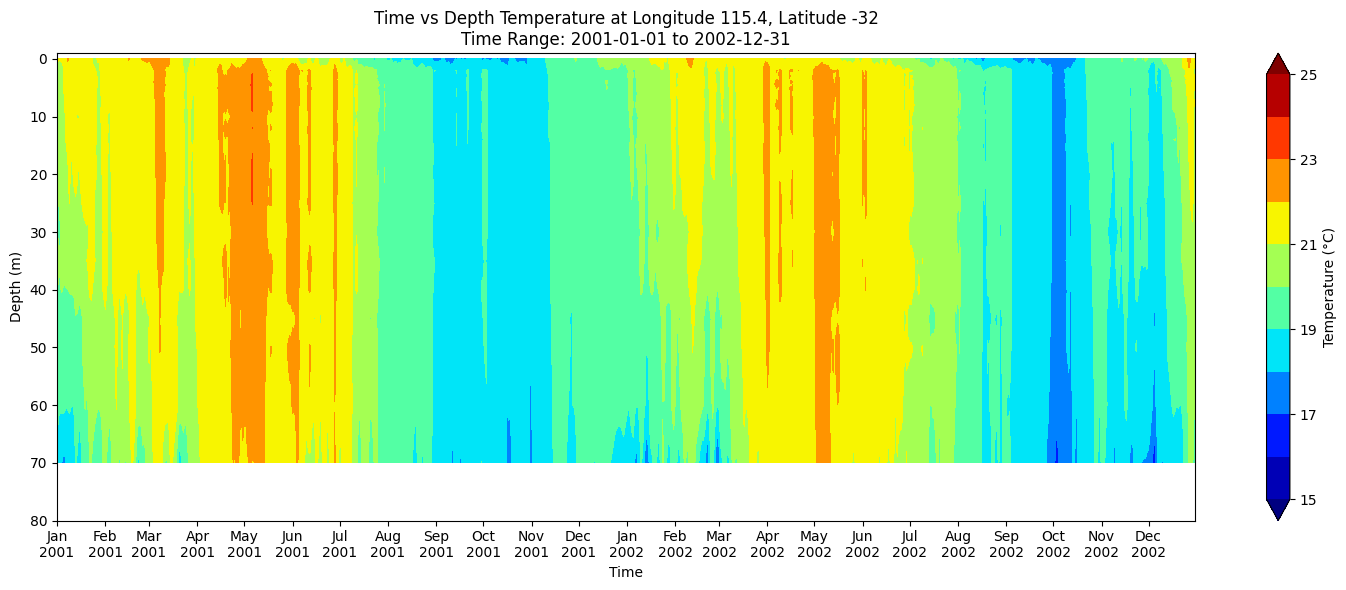

In [39]:
 plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2001-01-01', '2002-12-31'))

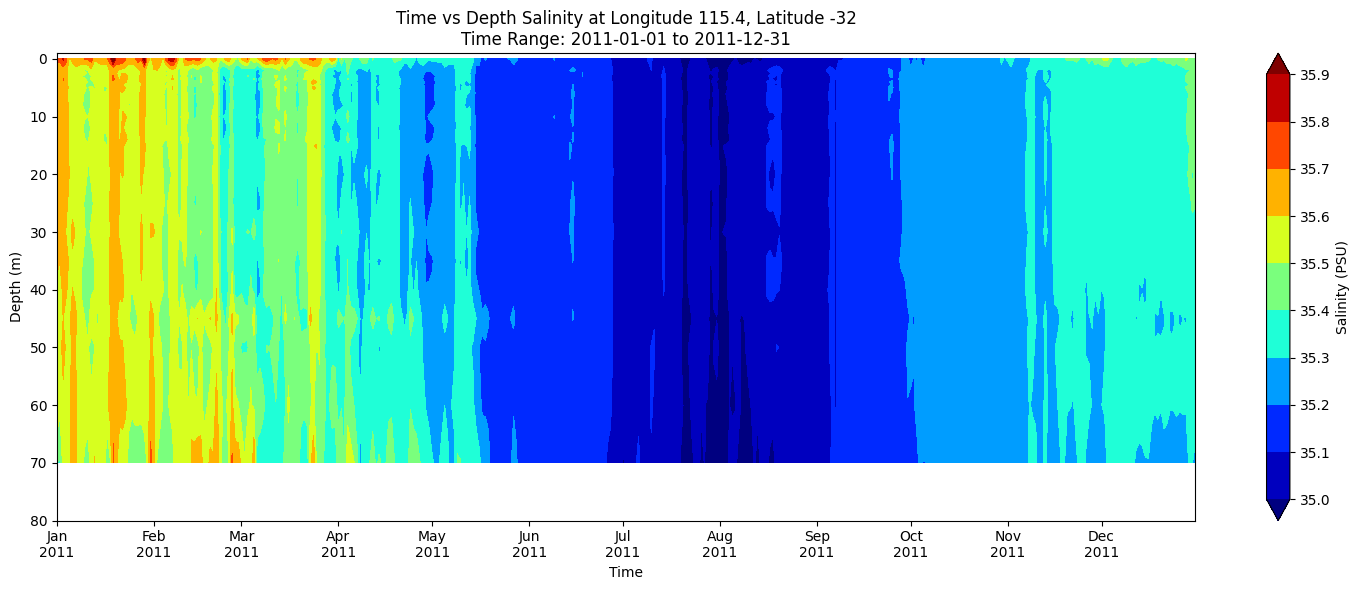

In [45]:
plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2011-01-01', '2011-12-31'))

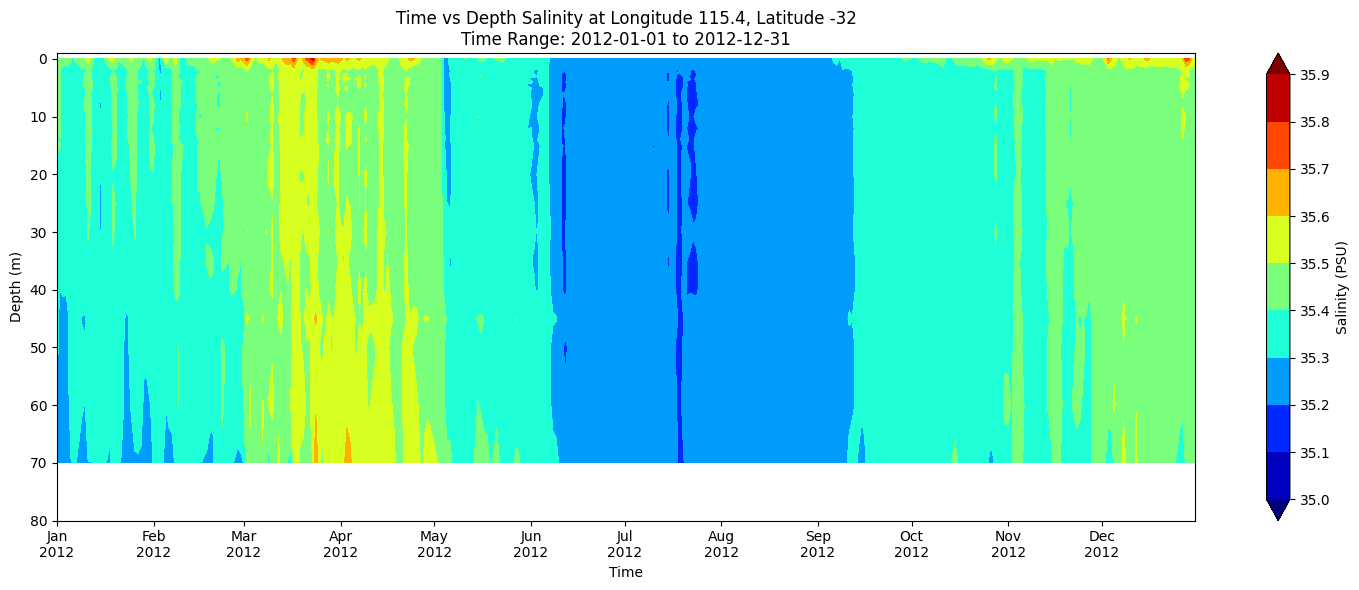

In [46]:
plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2012-01-01', '2012-12-31'))

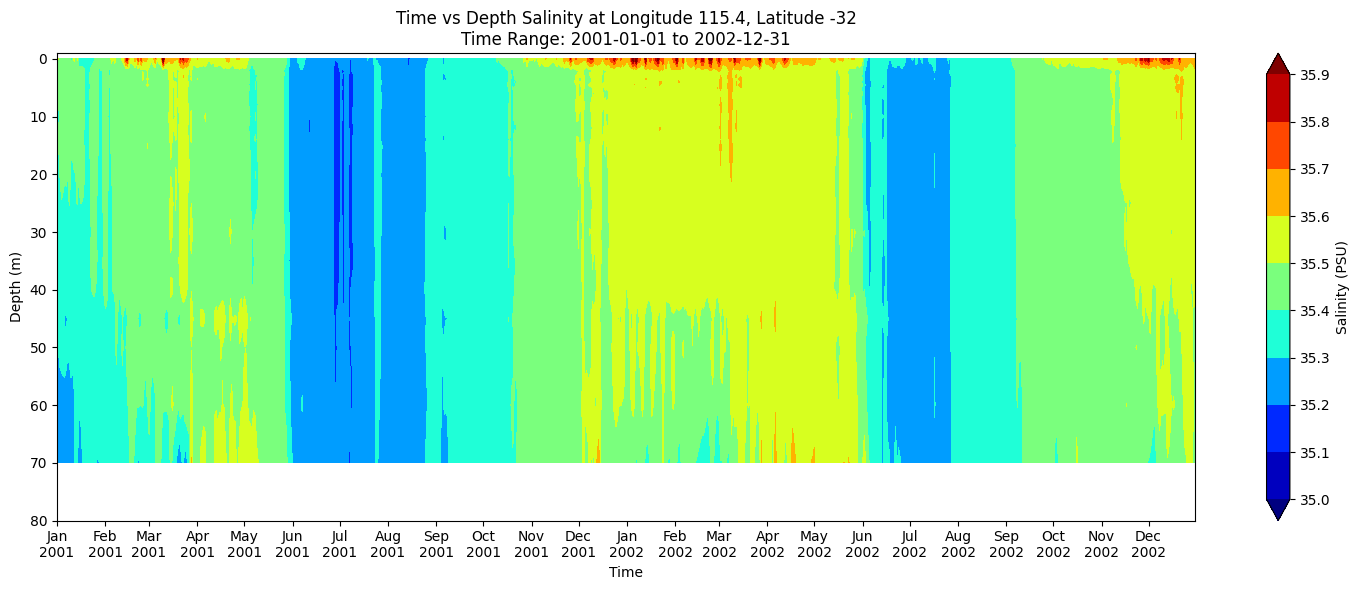

In [47]:
 plot_time_depth(ds, longitude=115.4, latitude=-32, ticks='months', time_range=('2001-01-01', '2002-12-31'))

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates

def plot_time_depth(ds, longitude, latitude, ticks='years', time_range=None):
    """
    Plot temperature as a function of depth and time at a specific location, with optional slicing by time.

    Parameters:
        ds (xarray.Dataset): The dataset containing the data.
        longitude (float): Longitude of the location.
        latitude (float): Latitude of the location.
        ticks (str): 'years' for yearly ticks, 'months' for monthly ticks.
        time_range (tuple of str, optional): Start and end time in the format ('YYYY-MM-DD', 'YYYY-MM-DD').
                                             If None, the entire time series is plotted.
    """
    # Slice the dataset by longitude and latitude
    ds_at_lon_lat = ds.sel(lon=longitude, lat=latitude, method="nearest")
    
    # Slice by time range if specified
    if time_range is not None:
        start_time, end_time = time_range
        ds_at_lon_lat = ds_at_lon_lat.sel(time=slice(start_time, end_time))
    
    # Create a contour plot
    fig, ax = plt.subplots(figsize=(15, 6))
    c = ax.contourf(
        ds_at_lon_lat['time'],
        ds_at_lon_lat['depth'],
        ds_at_lon_lat.salinity.values.T,  # Transpose to match (time, depth)
        cmap='jet', levels=np.arange(35, 36, 0.1), extend='both'
    )
    # contour_lines = ax.contour(
    #     ds_at_lon_lat['time'],
    #     ds_at_lon_lat['depth'],
    #     ds_at_lon_lat.water_temp.values.T,
    #     colors='black'
    # )
    ax.clabel(contour_lines, inline=True, fontsize=8)  # Add labels to contour lines
    fig.colorbar(c, ax=ax, label='Salinity (PSU)')
    ax.set_xlabel('Time')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim(-1, 80)
    ax.set_title(
        f"Time vs Depth Salinity at Longitude {longitude}, Latitude {latitude}"
        + (f"\nTime Range: {time_range[0]} to {time_range[1]}" if time_range else "")
    )
    ax.invert_yaxis()  # Invert depth axis

    # Customize x-axis ticks
    if ticks == 'years':
        ax.xaxis.set_major_locator(pltdates.YearLocator())
        ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
    elif ticks == 'months':
        ax.xaxis.set_major_locator(pltdates.MonthLocator())
        ax.xaxis.set_major_formatter(pltdates.DateFormatter('%b\n%Y'))

    # Automatically adjust the layout
    plt.tight_layout()
    plt.show()

#### TPI Calculation

In [36]:
ds=xr.open_dataset("/csiem/ROMS/Surface_temp/Perth_surface temp_Salt_2023.nc")
ds
# import xarray as xr
# out_dir = "/csiem/ROMS/Surface_temp/"
# several_ds = xr.open_mfdataset(f"{out_dir}/surface"+"*.nc")
# several_ds

<xarray.Dataset>
Dimensions:     (ocean_time: 365, lat: 259, lon: 129)
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-12-3...
    s_rho       float64 ...
  * lat         (lat) float64 -32.65 -32.64 -32.64 -32.63 ... -31.5 -31.5 -31.49
  * lon         (lon) float64 115.3 115.3 115.3 115.3 ... 115.9 115.9 115.9
Data variables:
    temp        (ocean_time, lat, lon) float64 ...
    salt        (ocean_time, lat, lon) float64 ...

In [19]:
ds= ds.resample(ocean_time="1M").mean()
ds

<xarray.Dataset>
Dimensions:     (ocean_time: 12, lat: 259, lon: 129)
Coordinates:
    s_rho       float64 -0.025
  * lat         (lat) float64 -32.65 -32.64 -32.64 -32.63 ... -31.5 -31.5 -31.49
  * lon         (lon) float64 115.3 115.3 115.3 115.3 ... 115.9 115.9 115.9
  * ocean_time  (ocean_time) datetime64[ns] 2023-01-31 2023-02-28 ... 2023-12-31
Data variables:
    temp        (ocean_time, lat, lon) float64 nan nan 20.93 nan ... nan nan nan
    salt        (ocean_time, lat, lon) float64 nan nan 35.81 nan ... nan nan nan

In [37]:
sst = ds['temp']
sst

<xarray.DataArray 'temp' (ocean_time: 365, lat: 259, lon: 129)>
[12195015 values with dtype=float64]
Coordinates:
  * ocean_time  (ocean_time) datetime64[ns] 2023-01-01T12:00:00 ... 2023-12-3...
    s_rho       float64 ...
  * lat         (lat) float64 -32.65 -32.64 -32.64 -32.63 ... -31.5 -31.5 -31.49
  * lon         (lon) float64 115.3 115.3 115.3 115.3 ... 115.9 115.9 115.9

In [8]:
sst=sst.sel(lon=slice(114, 116), lat=slice(-34, -30))
sst

<xarray.DataArray 'temp' (ocean_time: 276, lat: 218, lon: 123)>
dask.array<getitem, shape=(276, 218, 123), dtype=float64, chunksize=(1, 218, 123), chunktype=numpy.ndarray>
Coordinates:
    s_rho       float64 -0.02
  * lat         (lat) float64 -34.0 -33.98 -33.96 -33.94 ... -30.04 -30.02 -30.0
  * lon         (lon) float64 114.0 114.0 114.0 114.1 ... 116.0 116.0 116.0
  * ocean_time  (ocean_time) datetime64[ns] 2000-01-31 2000-02-29 ... 2022-12-31

In [15]:
N = 61
n = (N - 1) // 2
n

30

In [21]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

In [22]:
def nanmean_filter(array, size):
    """
    Compute the mean while ignoring NaN values using a moving window.
    This is a replacement for `uniform_filter()` to handle NaNs.
    """
    def nanmean(arr):
        return np.nanmean(arr) if np.any(~np.isnan(arr)) else np.nan  # Avoid all-NaN windows

    return ndimage.generic_filter(array, nanmean, size=size, mode='nearest')

def calculate_tpi(sst, N=31):  # Reduced window size to 31 (~31 km)
    """
    Compute TPI for a 3D SST DataArray (ocean_time, lat, lon).
    Uses a NaN-aware moving average to avoid issues with missing values.
    """
    # Compute the window average, ignoring NaNs
    window_avg = nanmean_filter(sst, size=(1, N, N))  

    # Compute TPI (difference between SST and the window average)
    tpi = sst - window_avg
    return tpi

In [38]:
tpi = xr.apply_ufunc(
    calculate_tpi, sst,
    input_core_dims=[["ocean_time", "lat", "lon"]],
    output_core_dims=[["ocean_time", "lat", "lon"]],
    vectorize=True,  # Apply function across time steps efficiently
    dask="parallelized",  # Enables parallel computation for large datasets
    #dask_gufunc_kwargs={'allow_rechunk': True}#dask_gufunc_kwargs={'allow_rechunk': True}
    
)

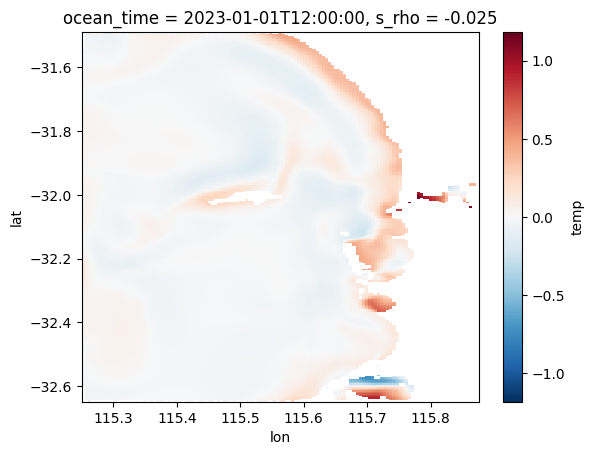

In [39]:
tpi[0].plot()

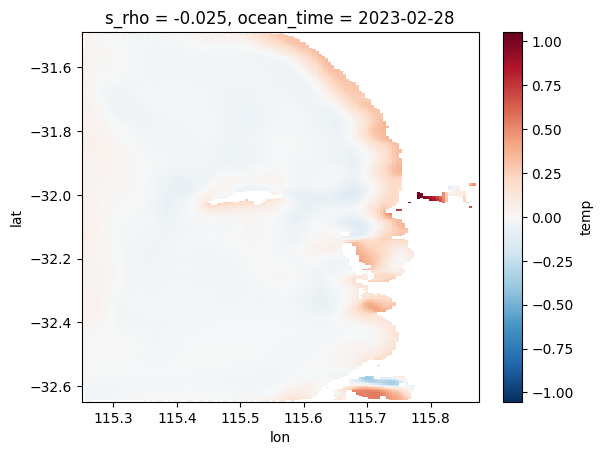

In [32]:
tpi[1].plot()

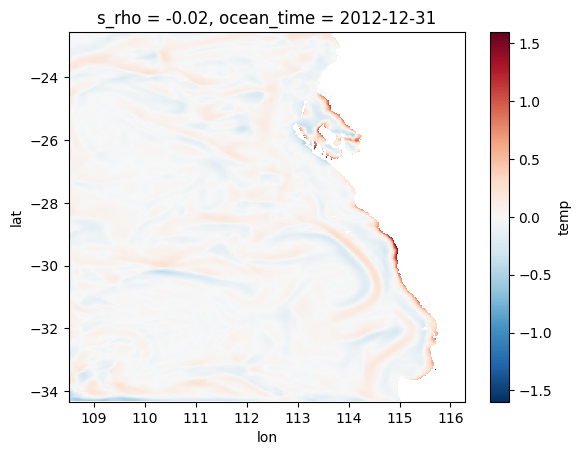

In [28]:
tpi[11].plot()

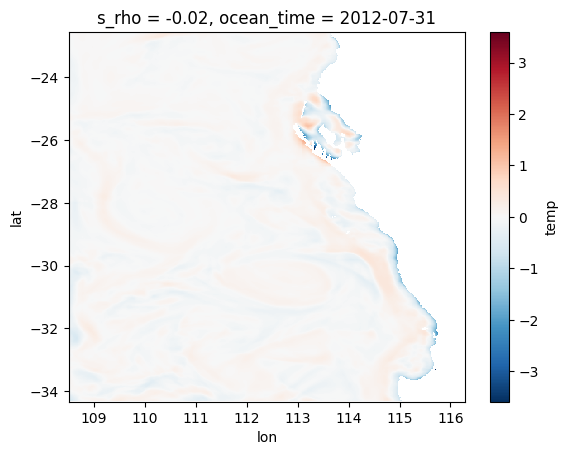

In [29]:
tpi[6].plot()

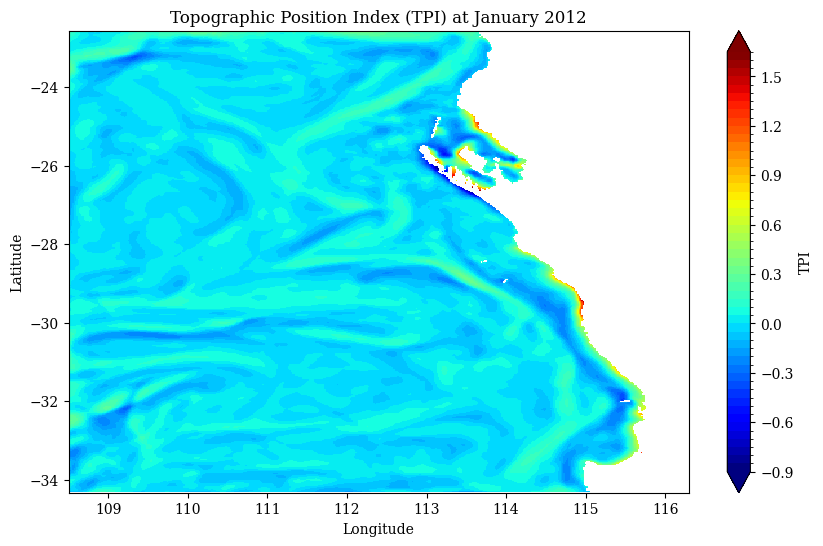

In [21]:
# Plotting the TPI for a specific time step
time_step = 0  # Example time step
tpi_at_time_step = tpi.isel(ocean_time=time_step)

# Plotting with a discrete colorbar
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(10, 6))

# Define the levels for the discrete colorbar
levels = MaxNLocator(nbins=55).tick_values(tpi_at_time_step.min(), tpi_at_time_step.max())

# Choose a colormap
cmap = plt.get_cmap('jet')

# Create a normalization object
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# Plot the TPI
im = ax.pcolormesh(tpi_at_time_step['lon'], tpi_at_time_step['lat'], tpi_at_time_step, cmap=cmap, norm=norm)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, extend='both')
cbar.set_label('TPI')

# Set the title and labels
ax.set_title('Topographic Position Index (TPI) at January 2012')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

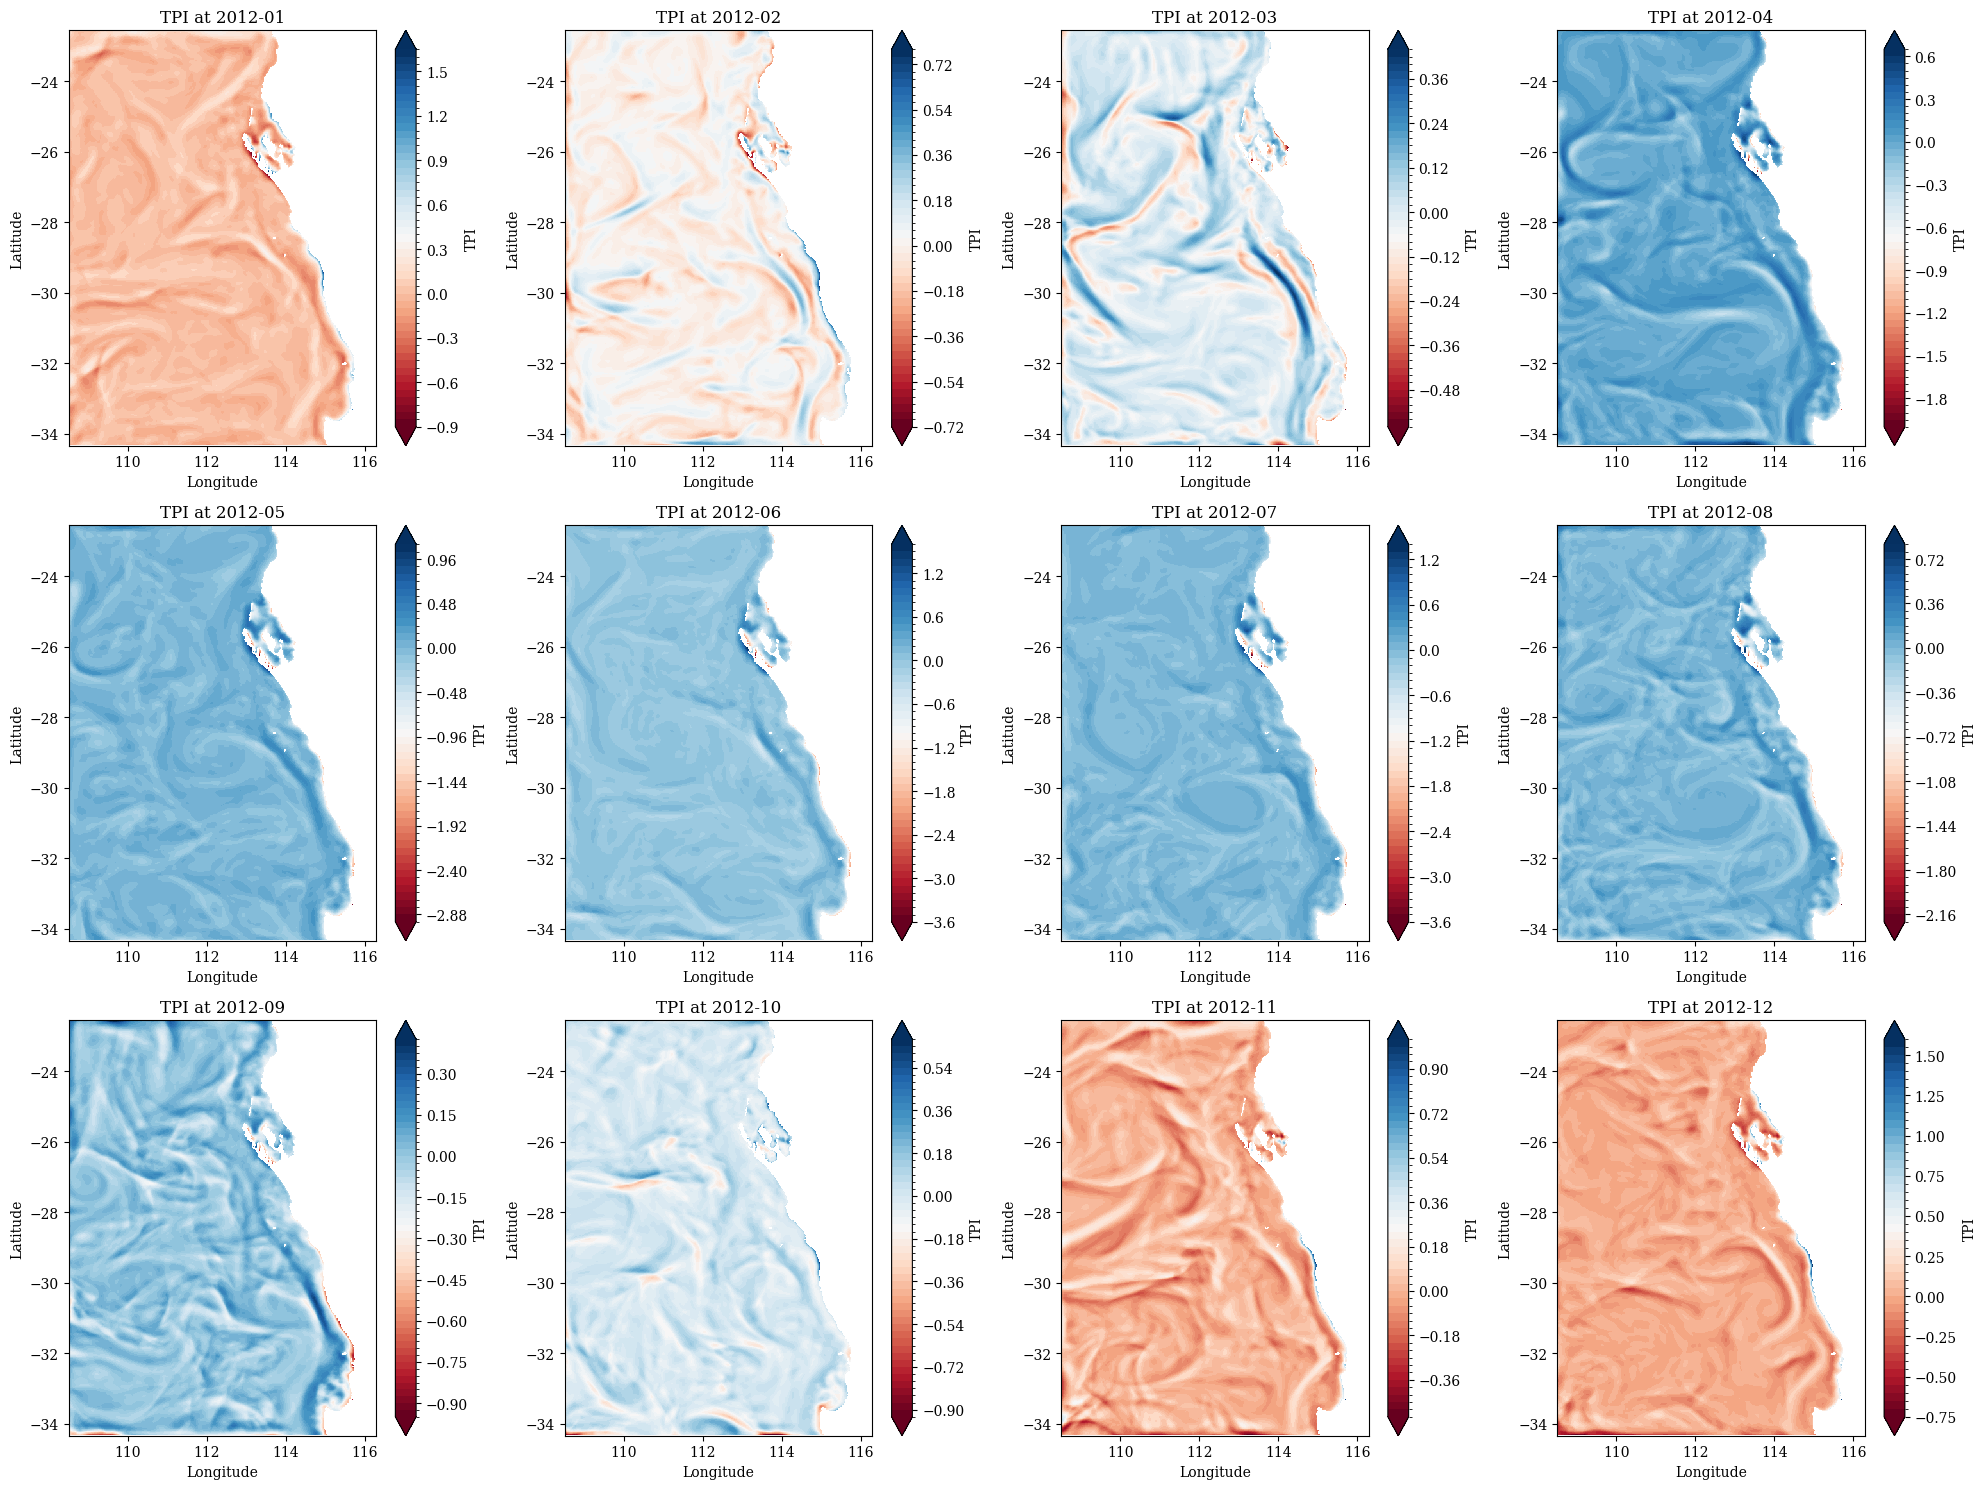

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

# Define the year you want to plot
year = 2012

# Create a figure with 12 subplots (3 rows, 4 columns)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Loop through each month
for month in range(1, 13):
    # Select the time step for the specific month
    time_step = f'{year}-{month:02d}'
    tpi_at_time_step = tpi.sel(ocean_time=time_step).squeeze()

    # Define the levels for the discrete colorbar
    levels = MaxNLocator(nbins=55).tick_values(tpi_at_time_step.min(), tpi_at_time_step.max())

    # Choose a colormap
    cmap = plt.get_cmap('RdBu')

    # Create a normalization object
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    # Plot the TPI
    im = axes[month - 1].pcolormesh(tpi_at_time_step['lon'], tpi_at_time_step['lat'], tpi_at_time_step, cmap=cmap, norm=norm)

    # Add a colorbar for each subplot
    cbar = fig.colorbar(im, ax=axes[month - 1], extend='both')
    cbar.set_label('TPI')

    # Set the title and labels
    axes[month - 1].set_title(f'TPI at {time_step}')
    axes[month - 1].set_xlabel('Longitude')
    axes[month - 1].set_ylabel('Latitude')

# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
tpi_ts=tpi.mean(dim=("lat", "lon"))
tpi_ts

<xarray.DataArray 'temp' (ocean_time: 12)>
array([ 0.01110786,  0.00704668,  0.00128897, -0.01036519, -0.0182711 ,
       -0.02069259, -0.01885419, -0.01163493, -0.00243994,  0.00309252,
        0.00901959,  0.0093471 ])
Coordinates:
    s_rho       float64 -0.025
  * ocean_time  (ocean_time) datetime64[ns] 2023-01-31 2023-02-28 ... 2023-12-31

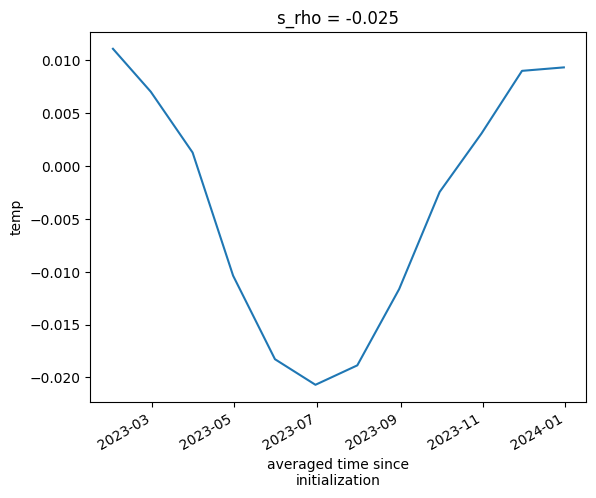

In [35]:
tpi_ts.plot()

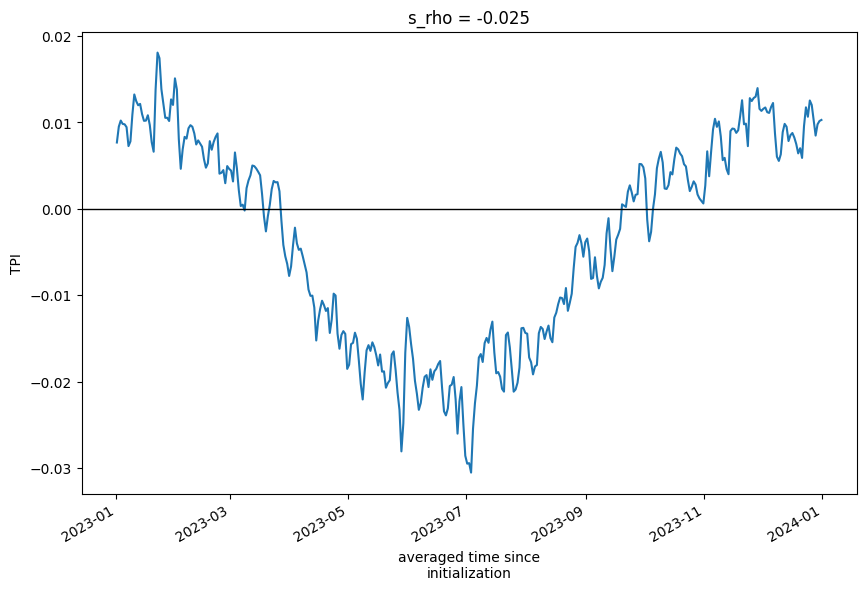

In [43]:
import matplotlib.pyplot as plt
tpi_ts = tpi.mean(dim=("lat", "lon"))# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=(10, 6))
tpi_ts.plot(ax=ax)
# Add y-axis label
ax.set_ylabel('TPI')
# Create thick solid line through y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
# Show the plot
plt.show()

In [35]:
import rioxarray
import geopandas as gpd
# Load the shapefile
gdf = gpd.read_file("./Shapefile/csiem_material_011_1_MultiPolygon.shp")

# Ensure the shapefile has a valid CRS
gdf = gdf.to_crs("EPSG:4326")  # Convert to WGS84 if necessary

In [39]:
tpi.rio.write_crs("EPSG:4326", inplace=True)
tpi.rio.set_spatial_dims('lon', 'lat', inplace=True)   
# Clip datasets
tpi_cropped = tpi.rio.clip(gdf.geometry, gdf.crs)

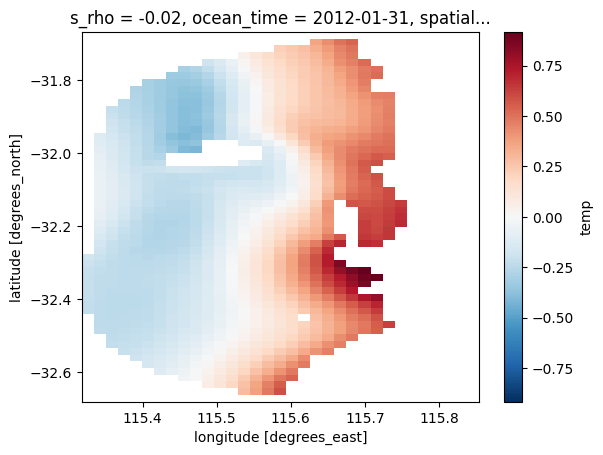

In [41]:
tpi_cropped[0].plot()

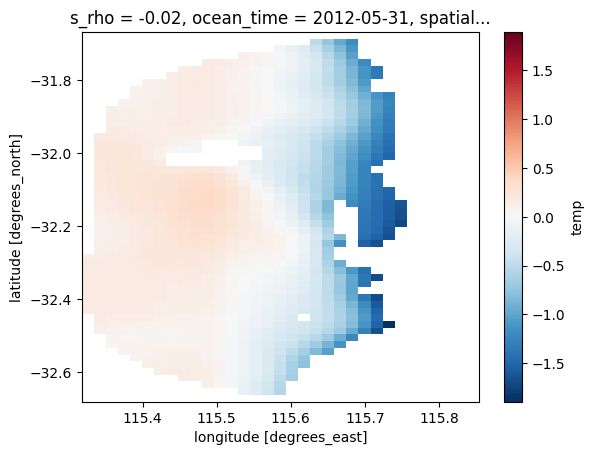

In [42]:
tpi_cropped[4].plot()